In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams["figure.figsize"] = 18, 6

In [2]:
df = pd.read_csv("data/stocks_info.csv")

In [3]:
df.head()

,Date,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
0,2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
1,2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2,2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
3,2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
4,2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df["Date"]
df.drop("Date", axis=1, inplace=True)
df.head()

,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
Date,,,,,,,,,,,,,,,,,
2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 2017-01-02 to 2024-12-30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close PETR4    1992 non-null   float64
 1   Volume PETR4   1992 non-null   int64  
 2   Close ITUB4    1992 non-null   float64
 3   Volume ITUB4   1992 non-null   int64  
 4   Close VALE3    1992 non-null   float64
 5   Volume VALE3   1992 non-null   int64  
 6   Close BBAS3    1992 non-null   float64
 7   Volume BBAS3   1992 non-null   int64  
 8   Close BBSE3    1992 non-null   float64
 9   Volume BBSE3   1992 non-null   int64  
 10  Close B3SA3    1992 non-null   float64
 11  Volume B3SA3   1992 non-null   int64  
 12  Close SAPR11   1742 non-null   float64
 13  Volume SAPR11  1742 non-null   float64
 14  SELIC          1986 non-null   float64
 15  IPCA           1992 non-null   float64
 16  Cambio         1986 non-null   float64
dtypes: float64(11), int64(6)
memory us

In [6]:
stocks_list = ["PETR4", "ITUB4", "VALE3", "BBAS3", "BBSE3", "B3SA3", "SAPR11"]

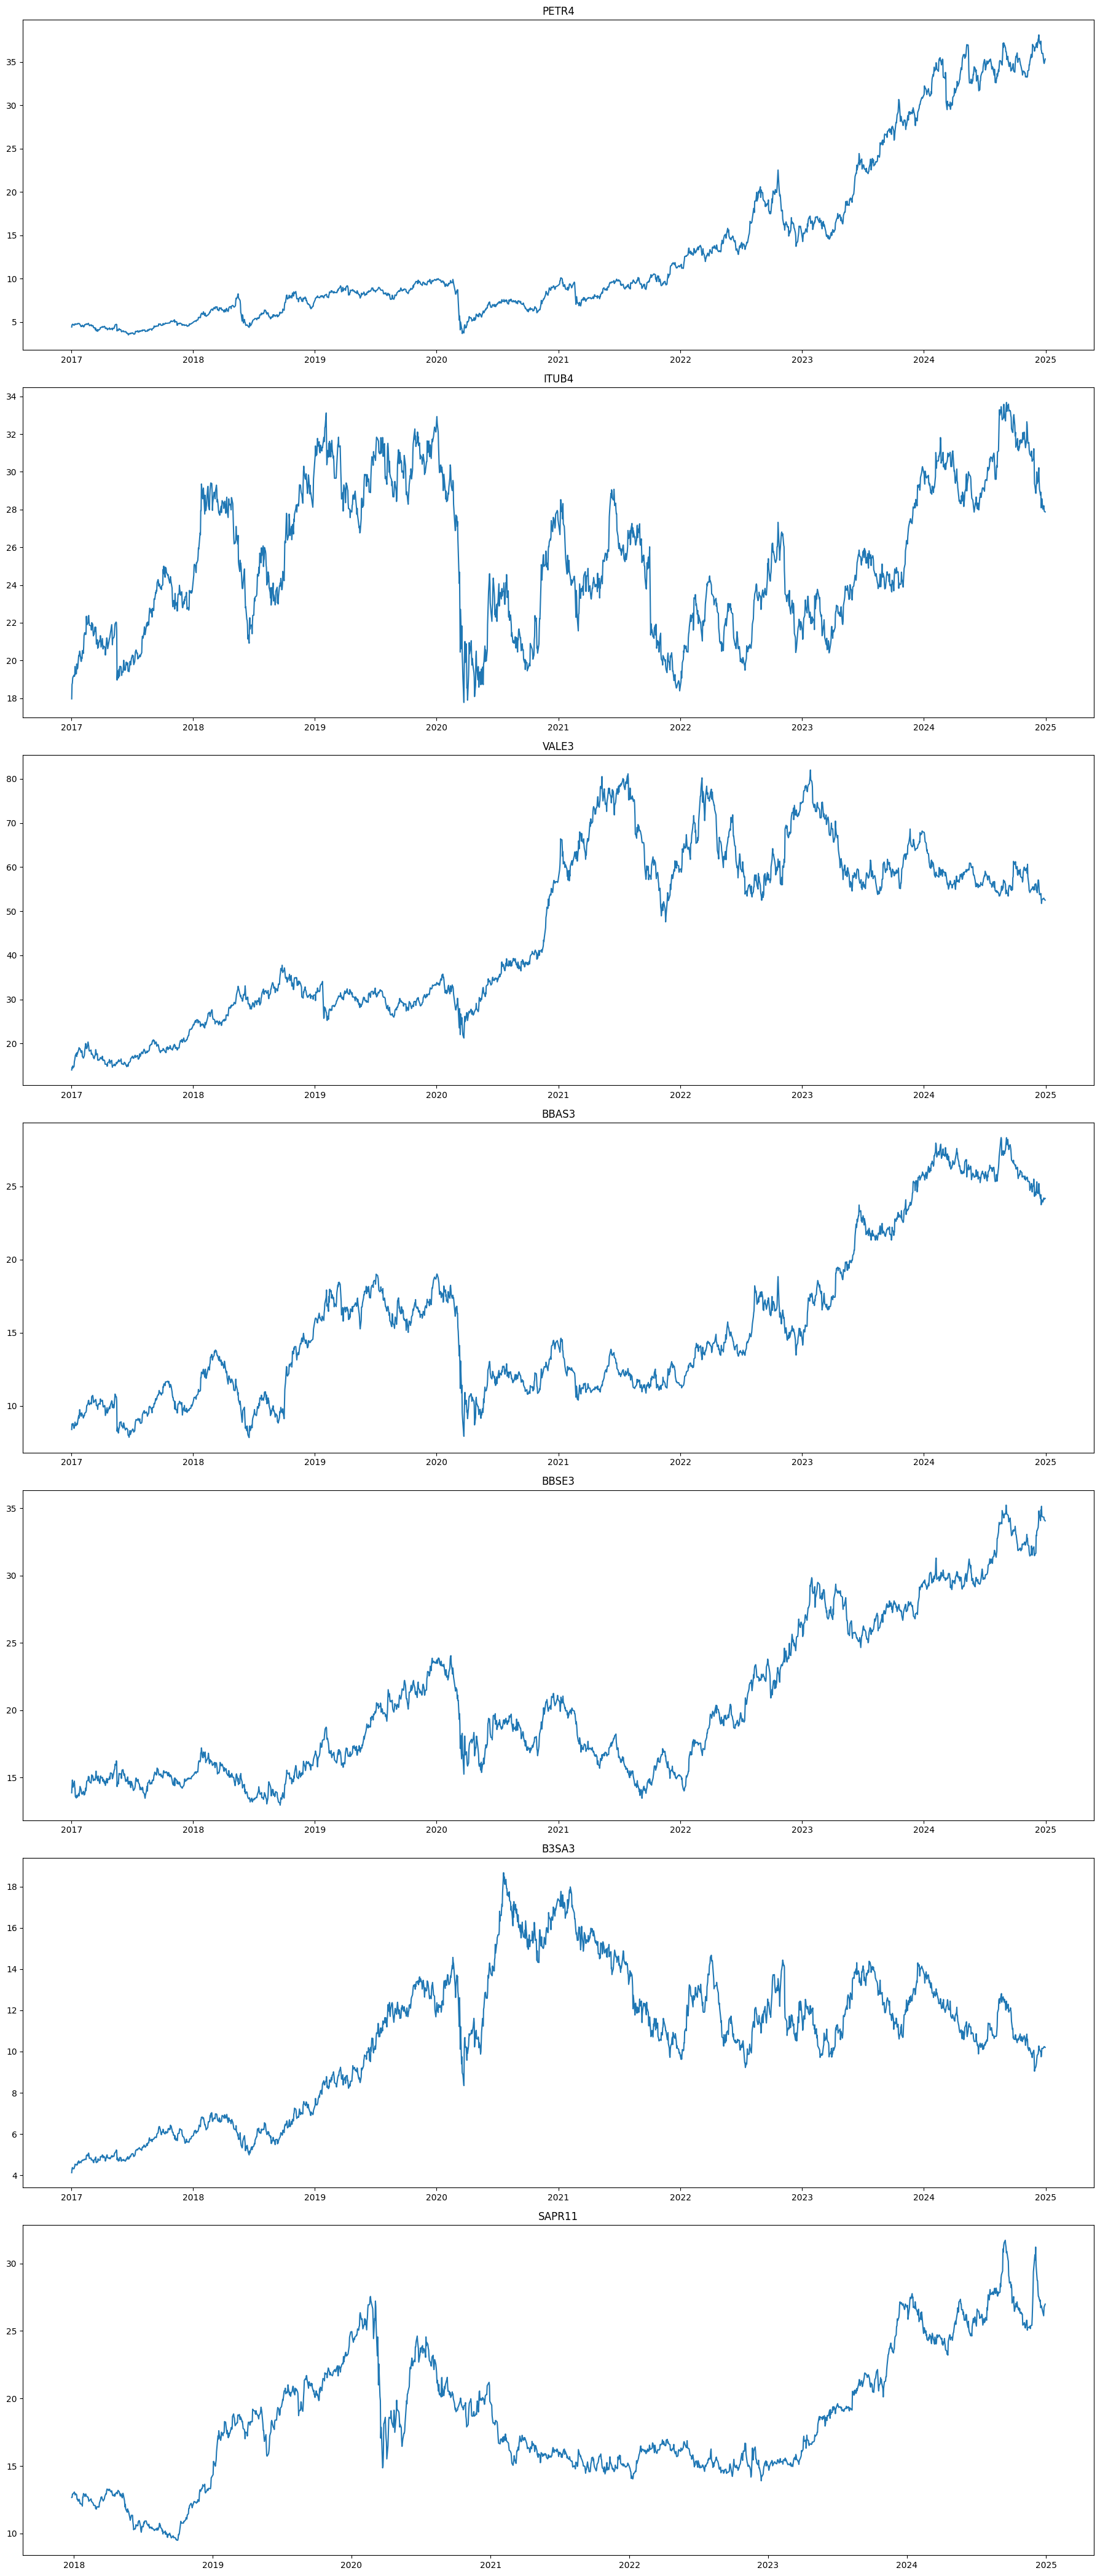

In [7]:
graphic_height = 6
fig, axs = plt.subplots(len(stocks_list), figsize=(18, graphic_height * len(stocks_list)))

for i, stock in enumerate(stocks_list):
    axs[i].plot(df[f"Close {stock}"])
    axs[i].set_title(f"{stock}")

plt.tight_layout()
plt.show()

In [8]:
df_2021 = df.loc[df.index.year >= 2021]
df_2024 = df.loc[df.index.year >= 2024]

<Axes: >

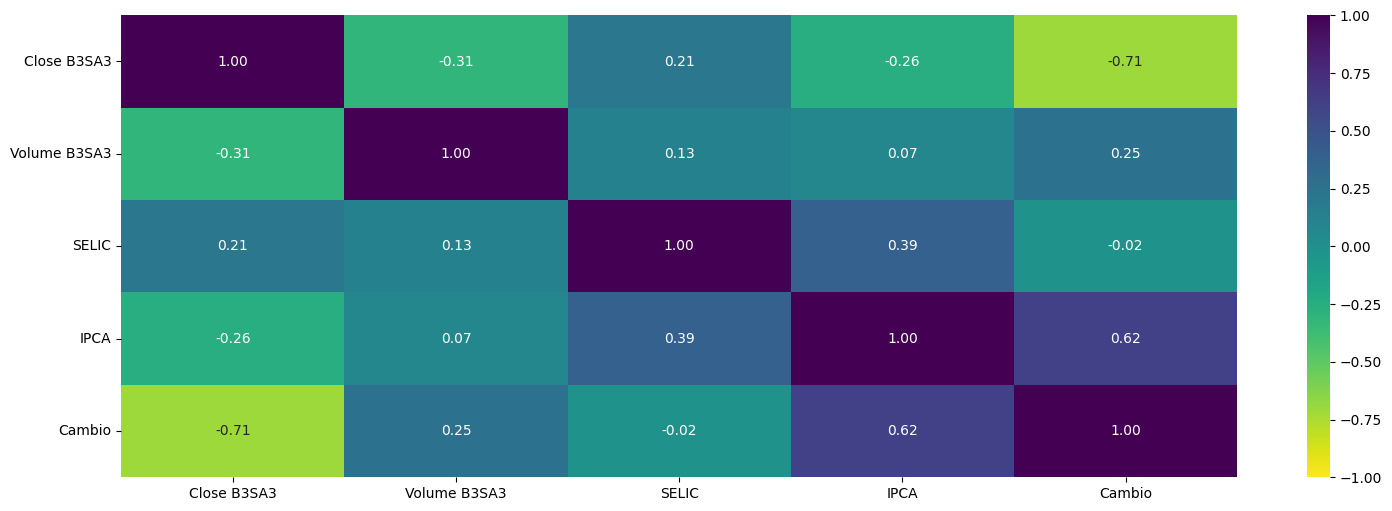

In [9]:
sns.heatmap(df_2024[["Close B3SA3", "Volume B3SA3", "SELIC", "IPCA", "Cambio"]].corr(), vmin=-1, vmax=1, cmap="viridis_r", annot=True, fmt='.2f')

In [10]:
df_bbas = df[["Close BBAS3", "Volume BBAS3", "SELIC", "IPCA", "Cambio"]]

In [11]:
df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
df_bbas["Lag 5"] = df["Close BBAS3"].shift(5)

C:\Users\felip\AppData\Local\Temp\ipykernel_20312\1573924806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
C:\Users\felip\AppData\Local\Temp\ipykernel_20312\1573924806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
C:\Users\felip\AppData\Local\Temp\ipykernel_20312\1573924806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
df_bbas["ma_10d"] = df["Close BBAS3"].rolling(window=10).mean()
df_bbas["ma_20d"] = df["Close BBAS3"].rolling(window=20).mean()
df_bbas["ma_5d"] = df["Close BBAS3"].rolling(window=5).mean()

In [12]:
df_bbas.dropna(inplace=True)
df_bbas.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_20312\3231079627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas.dropna(inplace=True)


,Close BBAS3,Volume BBAS3,SELIC,IPCA,Cambio,Lag 1,Lag 3,Lag 5
Date,,,,,,,,
2017-01-09,8.469719,30980400,0.1375,0.05354,3.2091,8.801803,8.728682,8.390503
2017-01-10,8.585491,10895200,0.1375,0.05354,3.1912,8.469719,8.707357,8.774381
2017-01-11,8.676892,11368400,0.1375,0.05354,3.2148,8.585491,8.801803,8.728682
2017-01-12,8.896250,18930200,0.1300,0.05354,3.1655,8.676892,8.469719,8.707357
2017-01-13,8.664706,10998400,0.1300,0.05354,3.2028,8.896250,8.585491,8.801803


In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [14]:
working_df = df_bbas.copy()

working_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1981 entries, 2017-01-09 to 2024-12-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close BBAS3   1981 non-null   float64
 1   Volume BBAS3  1981 non-null   int64  
 2   SELIC         1981 non-null   float64
 3   IPCA          1981 non-null   float64
 4   Cambio        1981 non-null   float64
 5   Lag 1         1981 non-null   float64
 6   Lag 3         1981 non-null   float64
 7   Lag 5         1981 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 139.3 KB


In [15]:
train_size = int(0.9 * len(working_df))

In [16]:
X = working_df[["Volume BBAS3", "SELIC", "IPCA", "Cambio", "Lag 1", "Lag 3", "Lag 5"]]
y = working_df[["Close BBAS3"]]

In [17]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

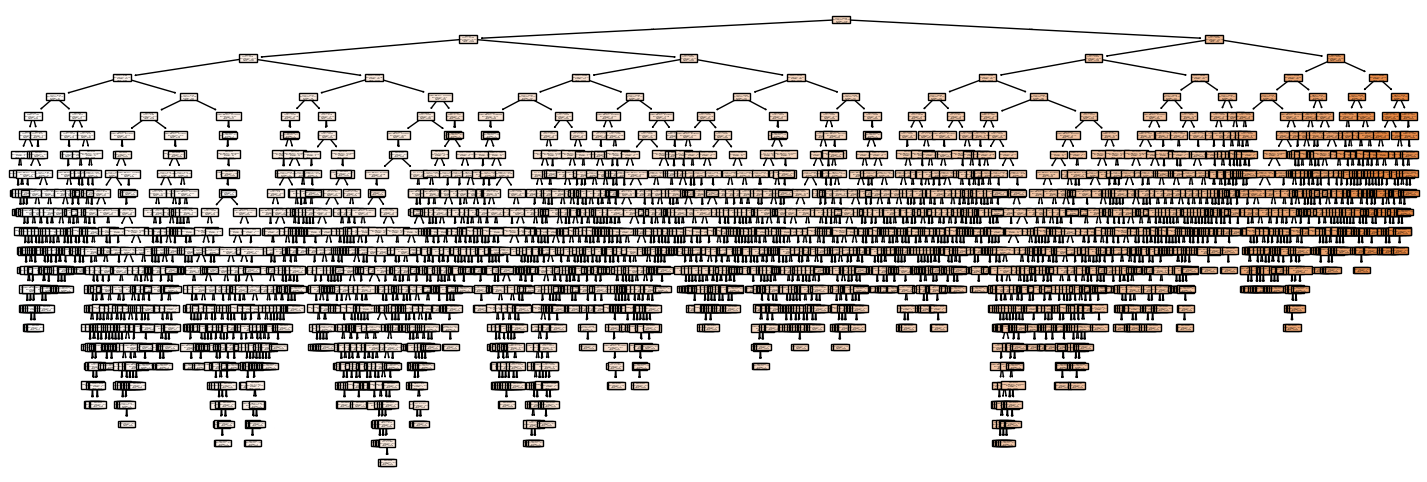

In [19]:
plot_tree(dt_reg,
          feature_names=X.columns,
          filled=True,
          node_ids=True)
plt.show()

In [20]:
dt_reg_features = pd.DataFrame({
    'features': X.columns,
    'importance': dt_reg.feature_importances_
})

dt_reg_features

,features,importance
0,Volume BBAS3,0.001609
1,SELIC,0.000402
2,IPCA,0.000228
3,Cambio,0.000839
4,Lag 1,0.995737
5,Lag 3,0.000620
6,Lag 5,0.000565


In [21]:
y_predict_train = dt_reg.predict(X_train)
y_predict_test = dt_reg.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = root_mean_squared_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print("Train")
print(f"MAPE {mape_train}")
print(f"RMSE: {rmse_train}")
print(f"R² {r2_train}")

mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = root_mean_squared_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

print("Test")
print(f"MAPE {mape_test}")
print(f"RMSE: {rmse_test}")
print(f"R² {r2_test}")

Train
MAPE 0.0
RMSE: 0.0
R² 1.0
Test
MAPE 0.01520898258725307
RMSE: 0.4965342359214402
R² 0.7122836221866118


In [22]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [23]:
rf_reg_features = pd.DataFrame({
    'features': X.columns,
    'importance': rf_reg.feature_importances_
})

rf_reg_features

,features,importance
0,Volume BBAS3,0.001323
1,SELIC,0.000406
2,IPCA,0.000325
3,Cambio,0.000699
4,Lag 1,0.873651
5,Lag 3,0.082749
6,Lag 5,0.040846


In [24]:
y_predict_train = rf_reg.predict(X_train)
y_predict_test = rf_reg.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = root_mean_squared_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print("Train")
print(f"MAPE {mape_train}")
print(f"RMSE: {rmse_train}")
print(f"R² {r2_train}")

mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = root_mean_squared_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

print("Test")
print(f"MAPE {mape_test}")
print(f"RMSE: {rmse_test}")
print(f"R² {r2_test}")

Train
MAPE 0.006488120306320477
RMSE: 0.12759071107891495
R² 0.9991553731620939
Test
MAPE 0.014913718423957946
RMSE: 0.469342532154295
R² 0.7429331880939762


In [25]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [26]:
xgb_reg_features = pd.DataFrame({
    'features': X.columns,
    'importance': xgb_reg.feature_importances_
})

xgb_reg_features

,features,importance
0,Volume BBAS3,0.000700
1,SELIC,0.001603
2,IPCA,0.000642
3,Cambio,0.000622
4,Lag 1,0.918055
5,Lag 3,0.011282
6,Lag 5,0.067097


In [27]:
y_predict_train = xgb_reg.predict(X_train)
y_predict_test = xgb_reg.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = root_mean_squared_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print("Train")
print(f"MAPE {mape_train}")
print(f"RMSE: {rmse_train}")
print(f"R² {r2_train}")

mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = root_mean_squared_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

print("Test")
print(f"MAPE {mape_test}")
print(f"RMSE: {rmse_test}")
print(f"R² {r2_test}")

Train
MAPE 0.003704134374856949
RMSE: 0.06872797012329102
R² 0.9997549057006836
Test
MAPE 0.022845689207315445
RMSE: 0.6833838224411011
R² 0.45500117540359497


In [28]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 1782, number of used features: 7
[LightGBM] [Info] Start training from score 14.421724


LGBMRegressor()

In [29]:
lgbm_reg_features = pd.DataFrame({
    'features': X.columns,
    'importance': lgbm_reg.feature_importances_
})

lgbm_reg_features

,features,importance
0,Volume BBAS3,791
1,SELIC,137
2,IPCA,186
3,Cambio,415
4,Lag 1,751
5,Lag 3,362
6,Lag 5,358


In [30]:
y_predict_train = lgbm_reg.predict(X_train)
y_predict_test = lgbm_reg.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = root_mean_squared_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print("Train")
print(f"MAPE {mape_train}")
print(f"RMSE: {rmse_train}")
print(f"R² {r2_train}")

mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = root_mean_squared_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

print("Test")
print(f"MAPE {mape_test}")
print(f"RMSE: {rmse_test}")
print(f"R² {r2_test}")

Train
MAPE 0.010538368044399584
RMSE: 0.1931674980204453
R² 0.9980640467272639
Test
MAPE 0.020401710020253094
RMSE: 0.6166771987797061
R² 0.5562054451257717


In [31]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)  # Cross validation com time series

modelos = {
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 5, 10],
            'ccp_alpha': [0.1, 0.01, 1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'num_leaves': [31, 50],
            'learning_rate': [0.01, 0.1]
        }
    }
}

In [32]:
best_models = {}

for nome, config in modelos.items():
    print(f"Treinando {nome}...")
    grid = GridSearchCV(config['model'],
                        config['params'],
                        cv=tscv,
                        scoring='r2',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[nome] = {
        'melhor_estimator': grid.best_estimator_,
        'melhor_score': grid.best_score_,
        'melhores_params': grid.best_params_
    }

Treinando DecisionTree...
Treinando RandomForest...


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Treinando XGBoost...
Treinando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 1782, number of used features: 7
[LightGBM] [Info] Start training from score 14.421724


In [33]:
best_models

{'DecisionTree': {'melhor_estimator': DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42),
  'melhor_score': 0.5139460069363186,
  'melhores_params': {'max_depth': 5, 'min_samples_split': 5}},
 'RandomForest': {'melhor_estimator': RandomForestRegressor(ccp_alpha=0.01, max_depth=5, n_estimators=50,
                        random_state=42),
  'melhor_score': 0.464990289119411,
  'melhores_params': {'ccp_alpha': 0.01, 'max_depth': 5, 'n_estimators': 50}},
 'XGBoost': {'melhor_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
   

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

params = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20],
    'ccp_alpha': [0, .01]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    params,
                    cv=tscv,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1,
                    verbose=1)
grid.fit(X_train, y_train.values.reshape(-1))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.01], 'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [35]:
grid.best_estimator_

RandomForestRegressor(ccp_alpha=0, max_depth=5, min_samples_leaf=5,
                      random_state=42)

In [36]:
-grid.best_score_

1.5452229221567204

In [37]:
grid.best_params_

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}

In [38]:
y_predict_train = grid.best_estimator_.predict(X_train)
y_predict_test = grid.best_estimator_.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = root_mean_squared_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print("Train")
print(f"MAPE {mape_train}")
print(f"RMSE: {rmse_train}")
print(f"R² {r2_train}")

mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = root_mean_squared_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

print("Test")
print(f"MAPE {mape_test}")
print(f"RMSE: {rmse_test}")
print(f"R² {r2_test}")

Train
MAPE 0.01577104607456558
RMSE: 0.29410935893052365
R² 0.9955120867828269
Test
MAPE 0.012941452409475236
RMSE: 0.42292080302138846
R² 0.7912702832766191


In [39]:
grid_rf_reg_features = pd.DataFrame({
    'features': X.columns,
    'importance': grid.best_estimator_.feature_importances_
})

grid_rf_reg_features

,features,importance
0,Volume BBAS3,0.000054
1,SELIC,0.000220
2,IPCA,0.000026
3,Cambio,0.000012
4,Lag 1,0.895588
5,Lag 3,0.076075
6,Lag 5,0.028026


In [40]:
y_predict_test = pd.Series(y_predict_test)
y_predict_train = pd.Series(y_predict_train)
y_predict_train.index = y_train.index
y_predict_test.index = y_test.index

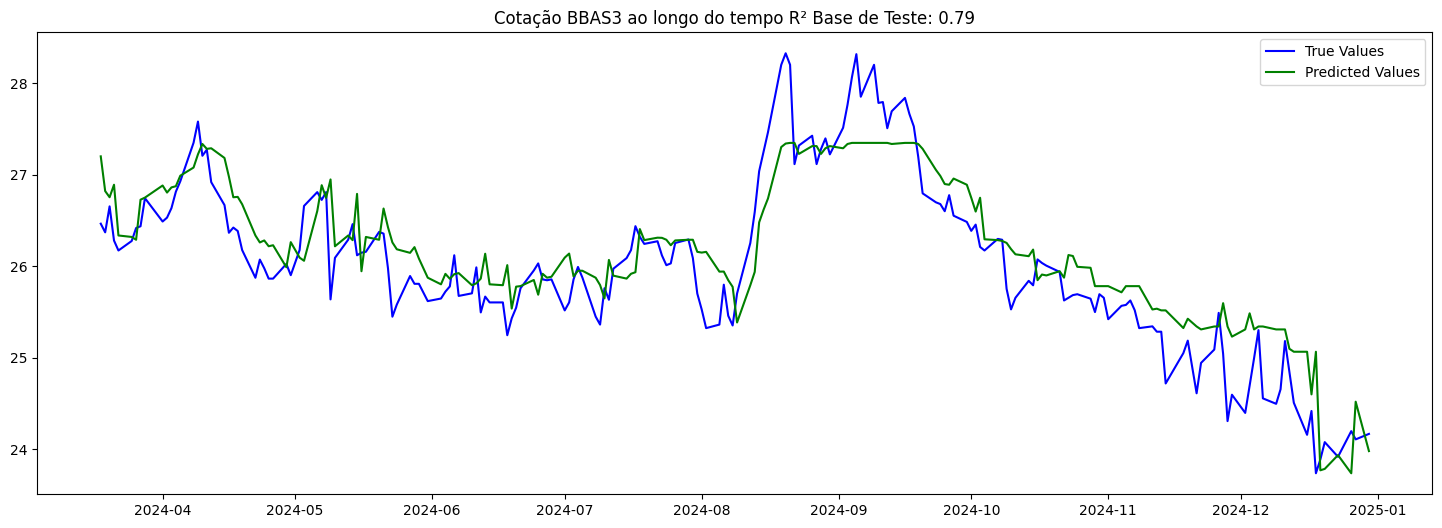

In [41]:
plt.plot(y_test, 'blue', label='True Values')
plt.plot(y_predict_test, 'green', label='Predicted Values')
plt.legend()
plt.title(f"Cotação BBAS3 ao longo do tempo R² Base de Teste: {r2_test:.2f}")
plt.show()
